## Imports

In [1]:
%matplotlib inline
import missingno as msno
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

### About the Data
I will perform an exploratory data analysis using Home Mortgage Disclosure Act (HMDA) data for one year 2013. https://www.consumerfinance.gov/data-research/hmda/explore

Let's load the data:

In [2]:
dataset = pd.read_csv("/Users/tamananaheeme/../hmda_lar.csv")

In [3]:
dataset.head() 

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,106.900002,NaN,2644.0,65.279999,713.0,735.0,169,105900.0,121.0,District of Columbia,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
1,159.820007,NaN,2206.0,32.590000,622.0,805.0,336,105900.0,296.0,District of Columbia,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,National Credit Union Administration,NCUA,Loan originated
2,24.690001,NaN,3310.0,99.059998,165.0,624.0,273,105900.0,54.0,District of Columbia,...,Female,NaN,NaN,NaN,NaN,Black or African American,Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated
3,104.029999,NaN,3364.0,25.360001,645.0,207.0,252,105900.0,51.0,District of Columbia,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated
4,20.340000,NaN,2414.0,99.379997,64.0,597.0,294,105900.0,97.0,District of Columbia,...,Male,NaN,NaN,NaN,NaN,Black or African American,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


### Summary statistics:

In [4]:
dataset.describe()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,co_applicant_race_name_5,co_applicant_race_name_4,census_tract_number,as_of_year,application_date_indicator
count,42874.000000,411.000000,42907.000000,42907.000000,42874.000000,42885.000000,43020.000000,42907.0,37841.000000,4.302000e+04,0.0,0.0,42907.000000,43020.0,43020.000000
mean,106.477065,2.522993,3828.367353,58.639575,848.034986,949.486790,437.010135,105900.0,167.132660,2.781540e+05,NaN,NaN,51.706900,2013.0,0.402371
std,60.331492,1.077614,1443.541035,30.299876,464.813384,492.887372,1641.877831,0.0,242.948026,4.832154e+05,NaN,NaN,32.791035,0.0,0.801782
min,10.480000,1.500000,33.000000,13.100000,15.000000,13.000000,1.000000,105900.0,1.000000,1.000000e+00,NaN,NaN,1.000000,2013.0,0.000000
25%,54.480000,1.705000,2794.000000,25.270000,541.000000,590.000000,200.000000,105900.0,77.000000,5.185000e+03,NaN,NaN,21.020000,2013.0,0.000000
50%,89.570000,2.080000,3446.000000,60.639999,760.000000,874.000000,318.000000,105900.0,120.000000,5.331500e+04,NaN,NaN,48.020000,2013.0,0.000000
75%,162.210007,3.240000,4648.000000,90.430000,1152.000000,1260.000000,460.000000,105900.0,188.000000,3.002020e+05,NaN,NaN,80.020000,2013.0,0.000000
max,247.789993,7.660000,7436.000000,99.750000,2224.000000,2281.000000,99999.000000,105900.0,9999.000000,2.246395e+06,NaN,NaN,111.000000,2013.0,2.000000


### What missing values are there?

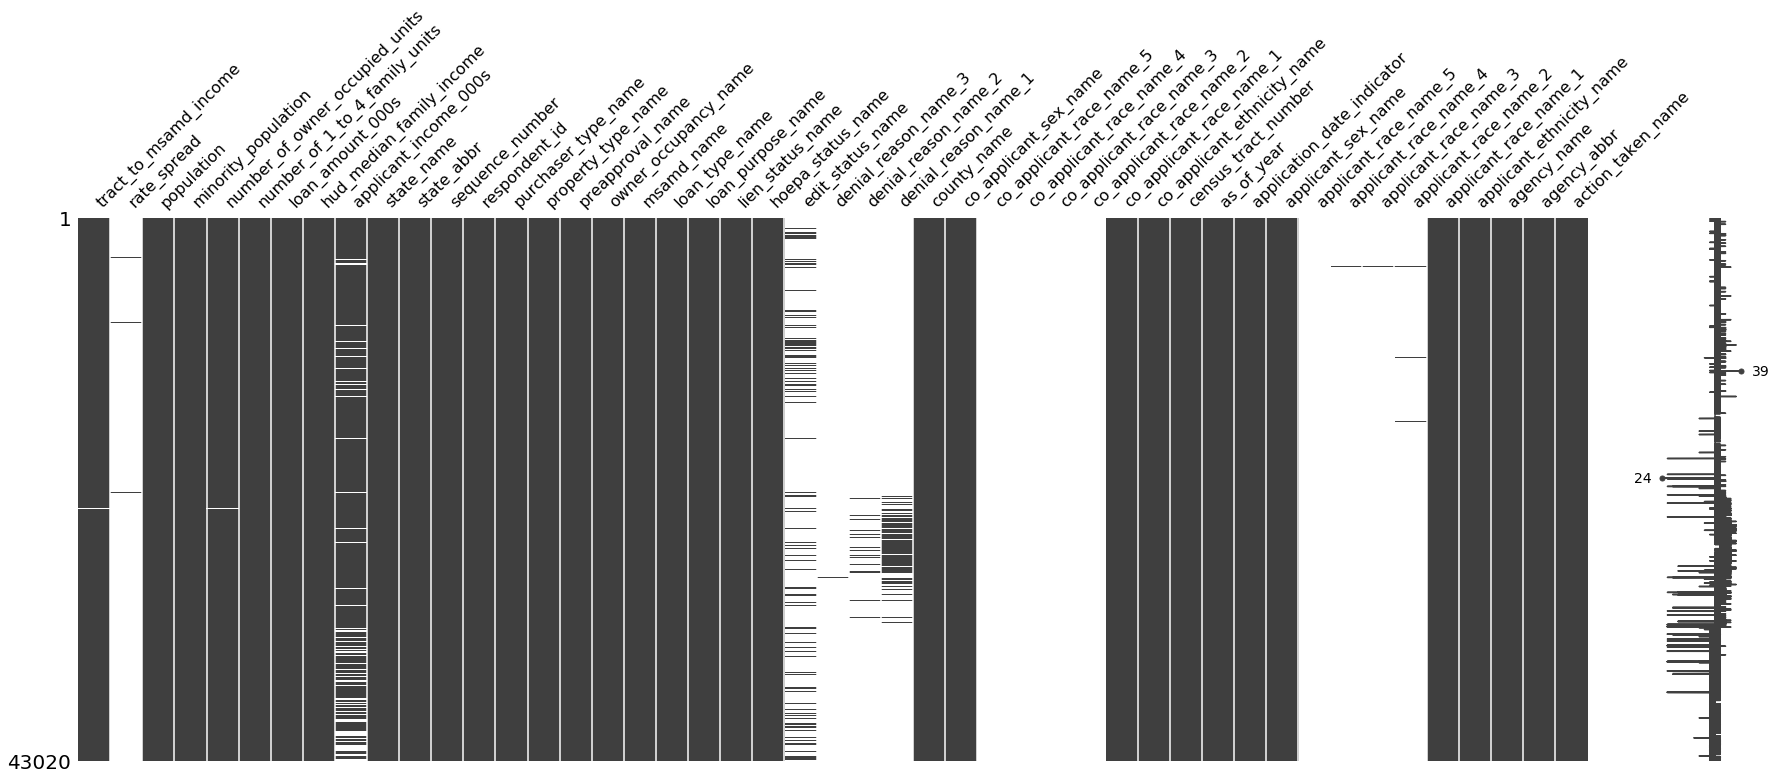

In [5]:
#Visualizing the location of missing values
msno.matrix(dataset, figsize = (30,10))

In [ ]:
# Alternatively, we can see the number of missing values like this
dataset.isnull().sum()

In [6]:
# Dropping features which are unnecessary or have mostly missing data

dataset = dataset.drop(['rate_spread', 
        'state_name', 
        'sequence_number', 
        'respondent_id',
        'msamd_name',
        'edit_status_name', 
        'denial_reason_name_3', 
        'denial_reason_name_2', 
        'denial_reason_name_1', 
        'co_applicant_race_name_5', 
        'co_applicant_race_name_4', 
        'co_applicant_race_name_3', 
        'co_applicant_race_name_2',
        'census_tract_number',
        'application_date_indicator', 
        'applicant_race_name_5', 
        'applicant_race_name_4', 
        'applicant_race_name_3', 
        'applicant_race_name_2', 
        'agency_name'], 
        axis=1)

In [7]:
# Different data types in the dataset
dataset.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                    int64
hud_median_family_income          float64
applicant_income_000s             float64
state_abbr                         object
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
county_name                        object
co_applicant_sex_name              object
co_applicant_race_name_1           object
co_applicant_ethnicity_name        object
as_of_year                          int64
applicant_sex_name                 object
applicant_race_name_1             

### Exploring target feature: 

In [8]:
dataset['action_taken'] = dataset.action_taken_name.apply(lambda x: 1 if x in ['Loan purchased by the institution', 'Loan originated'] else 0)
pd.crosstab(dataset['action_taken_name'],dataset['action_taken'], margins=True)

action_taken,0,1,All
action_taken_name,,,
Application approved but not accepted,1528,0,1528
Application denied by financial institution,6134,0,6134
Application withdrawn by applicant,3371,0,3371
File closed for incompleteness,1455,0,1455
Loan originated,0,21877,21877
Loan purchased by the institution,0,8655,8655
All,12488,30532,43020


1    30532
0    12488
Name: action_taken, dtype: int64


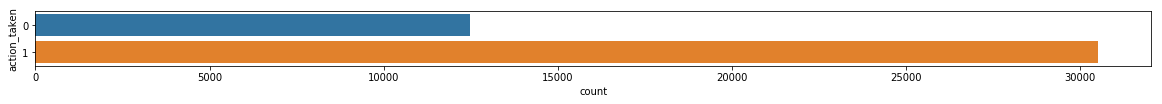

In [9]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='action_taken', data=dataset);
print(dataset.action_taken.value_counts())

In [10]:
df_bin = pd.DataFrame()  

In [11]:
df_bin['action_taken'] = dataset['action_taken']

In [12]:
df_bin.head()

,action_taken
0,1
1,1
2,1
3,1
4,1


### Feature encoding:

In [13]:
# One-hot encode binned variable
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('action_taken')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,action_taken
0,1
1,1
2,1
3,1
4,1


### Plotting the distribution:

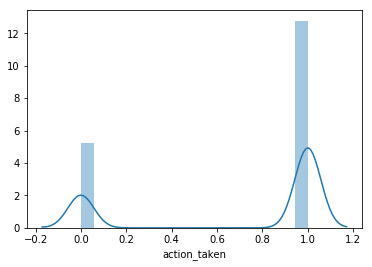

In [14]:
sns.distplot(dataset.action_taken)

### Making an area plot:

In [15]:
matplotlib.style.use('fivethirtyeight')

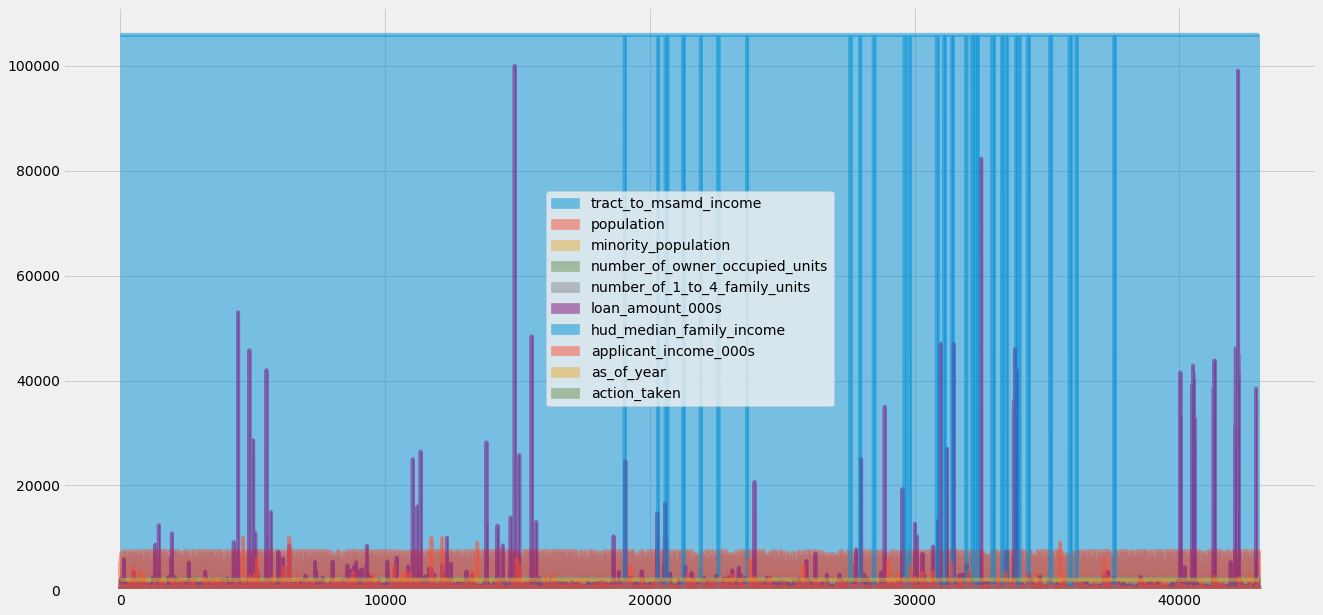

In [16]:
dataset.plot(kind='area', stacked=False,figsize=[20,10])

### Making a histogram:

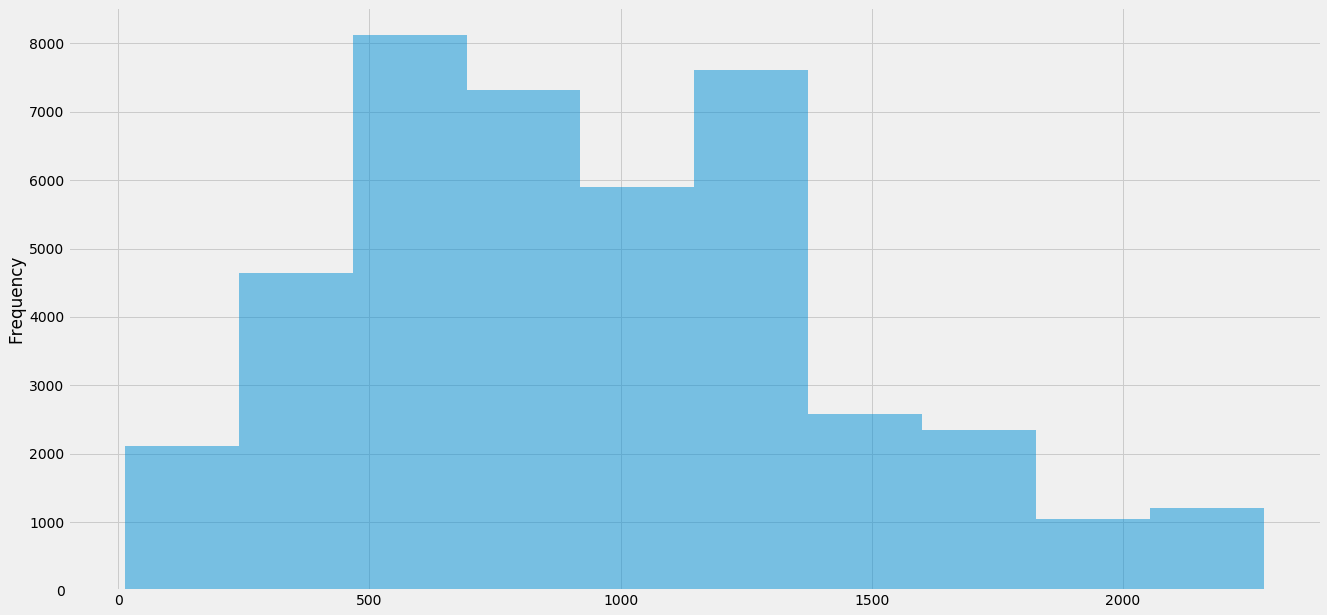

In [17]:
dataset['number_of_1_to_4_family_units'].plot(kind='hist', alpha=0.5, figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d210940>,
      dtype=object)

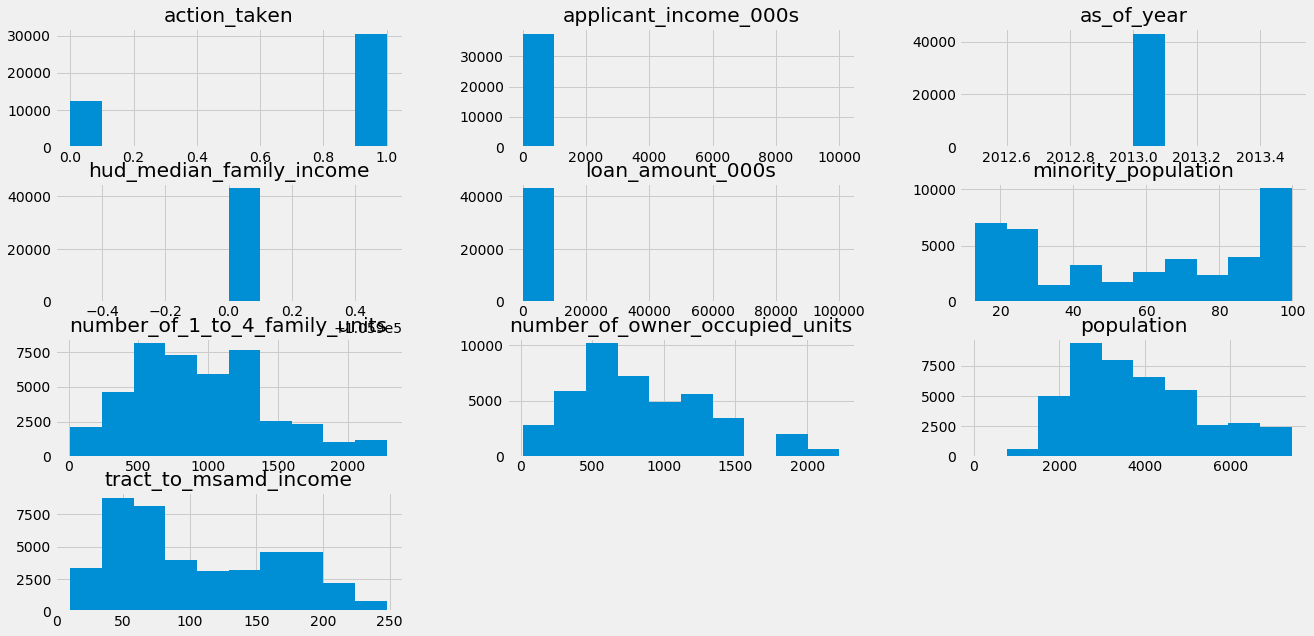

In [18]:
# Histogram for all features
dataset.hist(figsize=(20,10)) 

### Visualizing the distribution with a kernel density estimate:

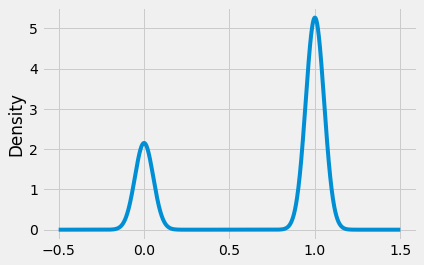

In [19]:
dataset['action_taken'].plot(kind='kde')

### Visualizing linear relationships:

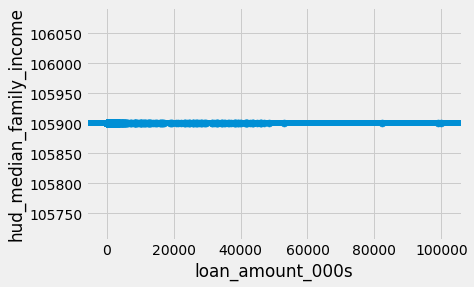

In [20]:
sns.regplot(x='loan_amount_000s', y='hud_median_family_income', data=dataset, x_estimator=np.mean)